Cargando datos desde: c:\Users\hopu_\Desktop\proyecto_gpu_ml\data\raw\GPU_benchmarks_v7.csv
¡Carga exitosa!

--- PRIMERAS 5 FILAS ---


,gpuName,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category
0,GeForce RTX 3090 Ti,29094,1117,2099.99,13.85,450.0,64.65,2022,Unknown
1,GeForce RTX 3080 Ti,26887,1031,1199.99,22.41,350.0,76.82,2021,Desktop
2,GeForce RTX 3090,26395,999,1749.99,15.08,350.0,75.41,2020,Desktop
3,Radeon RX 6900 XT,25458,1102,1120.31,22.72,300.0,84.86,2020,Desktop
4,GeForce RTX 3080,24853,1003,999.00,24.88,320.0,77.66,2020,Desktop



--- COLUMNAS DETECTADAS ---
['gpuName', 'G3Dmark', 'G2Dmark', 'price', 'gpuValue', 'TDP', 'powerPerformance', 'testDate', 'category']

--- VALORES NULOS POR COLUMNA ---
gpuName                0
G3Dmark                0
G2Dmark                0
price               1764
gpuValue            1764
TDP                 1625
powerPerformance    1625
testDate               0
category               0
dtype: int64


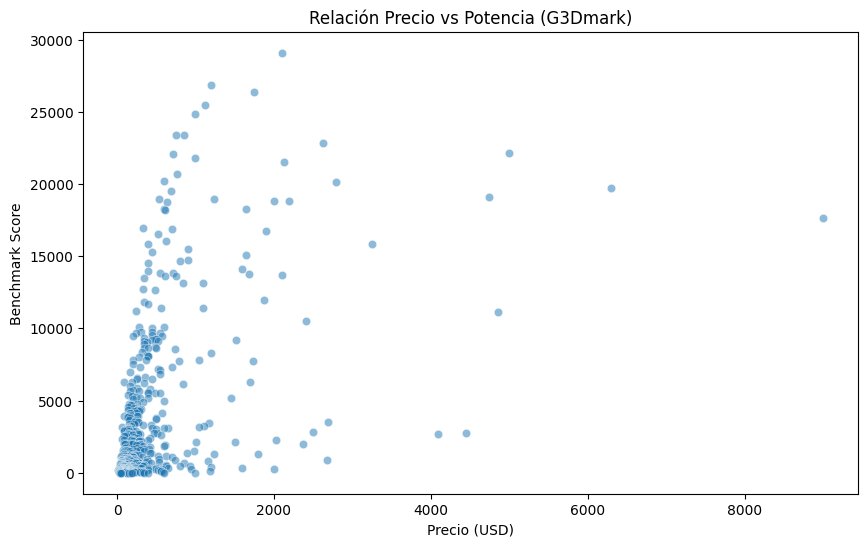

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# CONFIGURACIÓN DE RUTAS
# Esto hace que el código funcione sin importar en qué carpeta estés parado
BASE_DIR = os.path.dirname(os.getcwd()) # Sube un nivel desde 'notebooks'
DATA_PATH = os.path.join(BASE_DIR, 'data', 'raw', 'GPU_benchmarks_v7.csv')

# 1. CARGA DE DATOS
print(f"Cargando datos desde: {DATA_PATH}")
try:
    df = pd.read_csv(DATA_PATH)
    print("¡Carga exitosa!")
except FileNotFoundError:
    print("ERROR: No se encuentra el archivo. Verifica que esté en data/raw/")

# VISTA PREVIA
print("\n--- PRIMERAS 5 FILAS ---")
display(df.head())

print("\n--- COLUMNAS DETECTADAS ---")
print(df.columns.tolist())

# 2. LIMPIEZA INICIAL (Requisito Rúbrica 4.2)
# Vamos a ver cuántos nulos tenemos
print("\n--- VALORES NULOS POR COLUMNA ---")
print(df.isnull().sum())

# 3. GRÁFICO PRELIMINAR
# Ver relación precio vs potencia
if 'price' in df.columns and 'G3Dmark' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='price', y='G3Dmark', alpha=0.5)
    plt.title('Relación Precio vs Potencia (G3Dmark)')
    plt.xlabel('Precio (USD)')
    plt.ylabel('Benchmark Score')
    plt.show()

In [3]:
import os

# 4. LIMPIEZA PROFUNDA Y GUARDADO (Corregido)
# ---------------------------------------------------------

# A. Eliminamos filas nulas y usamos .copy() para evitar el Warning
df_clean = df.dropna(subset=['price', 'TDP', 'G3Dmark']).copy()

# B. FEATURE ENGINEERING
df_clean['price_per_watt'] = df_clean['price'] / df_clean['TDP']

print(f"Filas originales: {len(df)}")
print(f"Filas para entrenar (limpias): {len(df_clean)}")

# C. CREAR LA CARPETA SI NO EXISTE (Solución al OSError)
# Definimos la ruta de la carpeta 'processed'
processed_dir = os.path.join(BASE_DIR, 'data', 'processed')

# Este comando crea la carpeta si no existe
os.makedirs(processed_dir, exist_ok=True)

# D. GUARDAR EL ARCHIVO
output_path = os.path.join(processed_dir, 'gpu_cleaned.csv')
df_clean.to_csv(output_path, index=False)

print(f"¡Éxito! Dataset procesado guardado en: {output_path}")

Filas originales: 2317
Filas para entrenar (limpias): 387
¡Éxito! Dataset procesado guardado en: c:\Users\hopu_\Desktop\proyecto_gpu_ml\data\processed\gpu_cleaned.csv
